In [1]:
from sys import path 

In [2]:
data_generator_dir = "../Data_Generator"
program_dir =  "./ingestion_program"
code_dir =  "./sample_code_submission"

In [3]:
path.append(data_generator_dir)
path.append(program_dir)
path.append(code_dir)

In [4]:
from params import Params
from setting import Setting
from data_generator_physics import DataGenerator
from data_io import load_data

In [5]:
# Generate train params
data_gen_param = Params(
    pi=0.1,
    nu_1=100000,
    mu_range=[1.0, 1.0],
    systematics=[],
    verbose=False
)

data_gen_setting = Setting(
    params=data_gen_param
).get_setting()

# Train data
data_gen = DataGenerator(settings_dict=data_gen_setting)
data_gen.generate_data()
train_set1 = data_gen.get_data()
data_gen.save_data(directory="sample_data", data_type="train")

In [6]:
# Generate test params
systematics = [{
    "name": "Translation",
    "z_range": [-10, 10],
    "z_angles": [45]
}]

data_gen_param = Params(
    pi=0.1,
    nu_1=100000,
    mu_range=[1.0, 1.0],
    systematics=systematics,
    verbose=False
)

data_gen_setting = Setting(
    params=data_gen_param
).get_setting()

# Train data
data_gen = DataGenerator(settings_dict=data_gen_setting)
data_gen.generate_data()
valid_set = data_gen.get_data()

In [7]:
train_set2 = load_data("sample_data", "train")[0]



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data/train/data
[*] labels dir :  sample_data/train/labels
[*] settings dir :  sample_data/train/settings
[+] data dir found
[+] labels dir found
[+] settings dir found
[+] 1 datsets found
---------------------------------
[+] Data loaded!
---------------------------------




In [8]:
from model import Model

In [9]:
model1 = Model()
model1.fit(train_set1['data'], train_set1['labels'])
train_set1['predictions'] = model1.predict(train_set1['data'], 0)


/Users/ihsanullah/Desktop/Fair-Universe-Github/Competition_Bundle_Physics/./sample_code_submission/model.py:44: RuntimeWarning: invalid value encountered in log
  predicted_score = -np.log((1/(predicted_score+epsilon))-1)


In [10]:
model2 = Model()
model2.fit(train_set2['data'], train_set2['labels'])
train_set2['predictions'] = model2.predict(train_set2['data'], 0)

/Users/ihsanullah/Desktop/Fair-Universe-Github/Competition_Bundle_Physics/./sample_code_submission/model.py:44: RuntimeWarning: invalid value encountered in log
  predicted_score = -np.log((1/(predicted_score+epsilon))-1)


In [11]:
model3 = Model()
model3.fit(valid_set['data'], valid_set['labels'])
valid_set['predictions'] = model3.predict(valid_set['data'], 0)

/Users/ihsanullah/Desktop/Fair-Universe-Github/Competition_Bundle_Physics/./sample_code_submission/model.py:44: RuntimeWarning: invalid value encountered in log
  predicted_score = -np.log((1/(predicted_score+epsilon))-1)


In [12]:
from visualize import visualize_data

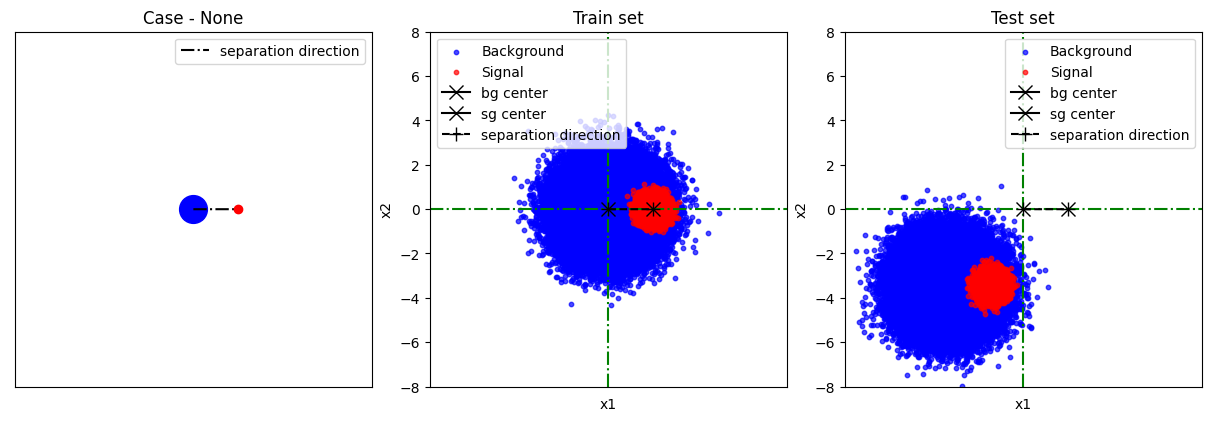

In [13]:
visualize_data(train_set1, valid_set)

In [14]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [18]:
balanced_accuracy_score(train_set1['labels'], train_set1['predictions'])

0.9323278554091345

In [19]:
balanced_accuracy_score(train_set2['labels'], train_set2['predictions'])

0.9323278554091345

In [20]:
balanced_accuracy_score(valid_set['labels'], valid_set['predictions'])

0.9284141830656967